In [184]:
import pandas as pd
import numpy as np
df = pd.read_csv("../saved/5m_journal_conf_comp_sci_with_rank_features.csv", index_col='PaperId')

In [143]:
df.head()

,PaperId,Abstract,Author_1,Author_10,Author_11,Author_2,Author_3,Author_4,Author_5,Author_6,...,Publisher,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin,AuthorRank,JournalNameRank,PublisherRank
PaperId.1,,,,,,,,,,,,,,,,,,,,,
2013266001,0,There are many application areas for wireless ...,2490270445,NaN,NaN,2.139859e+09,2.132916e+09,NaN,NaN,NaN,...,IEEE,20673,Voice over ZigBee wireless sensor network appl...,8.668493,0,low,below-average,16.0,1.0,627.0
2013266033,1,Two important automation characteristics are c...,1976502312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Academic Press, Inc.",22262,Crossing the boundaries of automation-Function...,5.668493,0,above-average,below-average,1.0,980.0,596.0
2147483772,2,The Japan Meteorological Agency (JMA) has deve...,2776874857,NaN,NaN,2.118487e+09,2.600472e+09,2.702858e+09,NaN,NaN,...,CODATA,20399,An Advanced System for Monitoring Geomagnetic ...,9.917808,0,low,below-average,1.0,449.0,358.0
2147483873,3,Abstract A technique is presented for solvin...,2084812160,NaN,NaN,2.670793e+09,2.659506e+09,1.917897e+09,2.088520e+09,NaN,...,North-Holland,23916,Solving linear equation systems on vector comp...,32.183562,0,high,low,11.0,1.0,609.0
2147483915,4,Many Internet of Things (IoT) technologies h...,2141485328,NaN,NaN,2.713835e+09,2.226086e+09,2.224880e+09,2.231733e+09,NaN,...,IEEE,18697,EasyConnect: A Management System for IoT Devic...,5.000000,1,low,high,1372.0,502.0,627.0


In [ ]:
print(df)

In [135]:
df.columns.tolist()

['Abstract',
 'Author_1',
 'Author_10',
 'Author_11',
 'Author_2',
 'Author_3',
 'Author_4',
 'Author_5',
 'Author_6',
 'Author_7',
 'Author_8',
 'Author_9',
 'CitationCount',
 'CitationCountPerYear',
 'FieldOfStudy_0',
 'FieldOfStudy_1',
 'FieldOfStudy_2',
 'FieldOfStudy_3',
 'FieldOfStudy_4',
 'FieldOfStudy_5',
 'FirstPage',
 'JournalName',
 'LastPage',
 'PaperId.1',
 'PublishedDate',
 'Publisher',
 'Rank',
 'Title',
 'YearsSincePublication',
 'AuthorProminence',
 'MagBin',
 'CitationBin',
 'AuthorRank',
 'JournalNameRank',
 'PublisherRank']

In [144]:
df_cs = df.loc[df["FieldOfStudy_0"] == "computer science"]
normalized_cc = df_cs["CitationCountPerYear"].values
normalized_cc.shape

(282456,)

In [8]:
print(f"Max number of citations per year: {np.max(normalized_cc)}")
print(f"Median number of citations per year: {np.median(normalized_cc)}")
print(f"Mean number of citations per year: {np.mean(normalized_cc)}")
print(f"Std number of citations per year: {np.std(normalized_cc)}")

print(f"Number of papers with 0 citations: {np.sum((normalized_cc == 0))}")
print(f"Number papers with over 25 citations per year: {np.sum(normalized_cc > 25)}")
print(f"Number papers with over 50 citations per year: {np.sum(normalized_cc > 50)}")
print(f"Number papers with over 100 citations per year: {np.sum(normalized_cc > 100)}")
print(f"Number papers with over 1k citations per year: {np.sum(normalized_cc > 1000)}")


Max number of citations per year: 3959.474504249291
Median number of citations per year: 0.2840466926070039
Mean number of citations per year: 1.7076045926911643
Std number of citations per year: 14.27315354135886
Number of papers with 0 citations: 64673
Number papers with over 25 citations per year: 2356
Number papers with over 50 citations per year: 823
Number papers with over 100 citations per year: 289
Number papers with over 1k citations per year: 7


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff25bf1f9d0>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

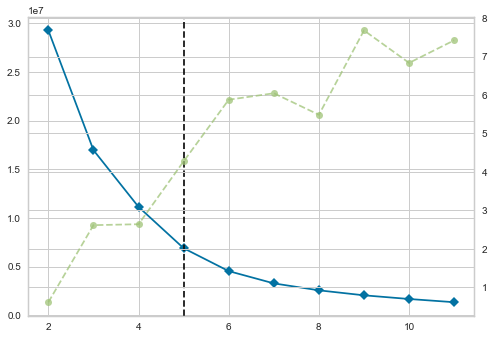

In [9]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(normalized_cc.reshape(-1, 1))

In [10]:
clstr = KMeans(n_clusters=4, random_state=0)
clstr.fit(normalized_cc.reshape(-1,1))
clstr.cluster_centers_

array([[1.39007271e+00],
       [3.52480239e+03],
       [8.11343641e+02],
       [1.31161341e+02]])

In [11]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4, random_state=0)
gmm.fit(normalized_cc.reshape(-1,1))
gmm.means_

array([[ 0.73958875],
       [ 0.08945403],
       [47.4271411 ],
       [ 5.27659034]])

In [135]:
gmm.predict([[3]])
gmm.covariances_

array([[[2.21767284e-01]],

       [[1.05692120e-02]],

       [[1.18690877e+04]],

       [[1.51908768e+01]]])

In [13]:
print(df_cs.shape)
df_cs.head()

(282456, 12)


,Abstract,CitationCount,CitationCountPerYear,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin,AuthorRank,JournalNameRank,PublisherRank
PaperId,,,,,,,,,,,,
0,There are many application areas for wireless ...,3,0.346081,20673,Voice over ZigBee wireless sensor network appl...,8.668493,0,low,below-average,16.0,1.0,627.0
1,Two important automation characteristics are c...,2,0.352827,22262,Crossing the boundaries of automation-Function...,5.668493,0,above-average,below-average,1.0,980.0,596.0
2,The Japan Meteorological Agency (JMA) has deve...,2,0.201657,20399,An Advanced System for Monitoring Geomagnetic ...,9.917808,0,low,below-average,1.0,449.0,358.0
3,Abstract A technique is presented for solvin...,1,0.031072,23916,Solving linear equation systems on vector comp...,32.183562,0,high,low,11.0,1.0,609.0
4,Many Internet of Things (IoT) technologies h...,26,5.200000,18697,EasyConnect: A Management System for IoT Devic...,5.000000,1,low,high,1372.0,502.0,627.0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation(df, columns=None, plot=True):
    t = df.loc[:, columns] if columns else df
    if not plot:
        print(t.corr())
    else:
        fig = plt.figure()
        mask = np.triu(t.corr())
        sns.heatmap(
            t.corr(),
            mask=mask,
            cbar=False,
            square=True,
            annot=True,
            vmin=-1,
            vmax=1,
            center=0,
            cmap="coolwarm_r",
            linecolor="black",
        )
        plt.show()

In [15]:
def custom_binning(x, thresholds):
    thresholds = thresholds.copy()
    thresholds.sort()
    for i, threshold in enumerate(thresholds):
        if (x <= threshold):
            return i + 1

    return len(thresholds)


In [145]:
thresholds = np.array([mu + np.sqrt(var).round() for mu, var in zip(gmm.means_, gmm.covariances_)]).flatten()
thresholds.sort()
n_bins = len(thresholds)
print(thresholds)
df_cs["BinnedCitations"] = pd.Series([custom_binning(x, thresholds) for x in normalized_cc], index=df_cs.index)
# df_cs["BinnedCitations"] = pd.Series(gmm.predict(cc.reshape(-1,1)).reshape(-1,), index=df_cs.index)
df_cs.head()

[8.94540334e-02 7.39588753e-01 9.27659034e+00 1.56427141e+02]


,PaperId,Abstract,Author_1,Author_10,Author_11,Author_2,Author_3,Author_4,Author_5,Author_6,...,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin,AuthorRank,JournalNameRank,PublisherRank,BinnedCitations
PaperId.1,,,,,,,,,,,,,,,,,,,,,
2013266001,0,There are many application areas for wireless ...,2490270445,NaN,NaN,2.139859e+09,2.132916e+09,NaN,NaN,NaN,...,20673,Voice over ZigBee wireless sensor network appl...,8.668493,0,low,below-average,16.0,1.0,627.0,2
2013266033,1,Two important automation characteristics are c...,1976502312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22262,Crossing the boundaries of automation-Function...,5.668493,0,above-average,below-average,1.0,980.0,596.0,2
2147483772,2,The Japan Meteorological Agency (JMA) has deve...,2776874857,NaN,NaN,2.118487e+09,2.600472e+09,2.702858e+09,NaN,NaN,...,20399,An Advanced System for Monitoring Geomagnetic ...,9.917808,0,low,below-average,1.0,449.0,358.0,2
2147483873,3,Abstract A technique is presented for solvin...,2084812160,NaN,NaN,2.670793e+09,2.659506e+09,1.917897e+09,2.088520e+09,NaN,...,23916,Solving linear equation systems on vector comp...,32.183562,0,high,low,11.0,1.0,609.0,1
2147483915,4,Many Internet of Things (IoT) technologies h...,2141485328,NaN,NaN,2.713835e+09,2.226086e+09,2.224880e+09,2.231733e+09,NaN,...,18697,EasyConnect: A Management System for IoT Devic...,5.000000,1,low,high,1372.0,502.0,627.0,3


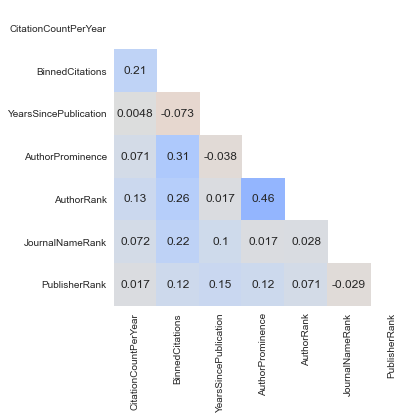

In [138]:
correlation(df_cs, columns=[
    "CitationCountPerYear",
    "BinnedCitations",
    "YearsSincePublication",
    "AuthorProminence",
    "AuthorRank",
    "JournalNameRank",
    "PublisherRank"
])

[84227, 114735, 73820, 9674]


([<matplotlib.axis.XTick at 0x7ff25d537f70>,
 <a list of 4 Text major ticklabel objects>)

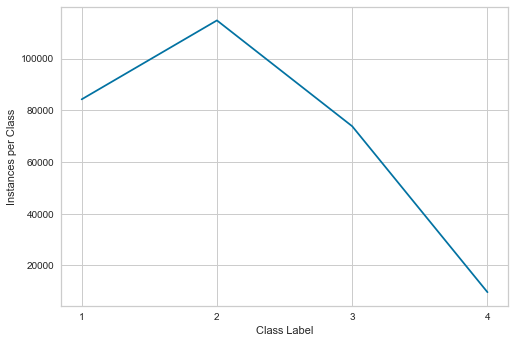

In [139]:
bins = list(range(1, 1 + n_bins))

x = [np.sum(df_cs.loc[:, "BinnedCitations"].values == c) for c in bins]
print(x)
fig = plt.figure()
plt.plot(bins, x)
plt.ylabel("Instances per Class")
plt.xlabel("Class Label")
plt.xticks(bins)

In [147]:
from sklearn.neural_network import MLPClassifier
features = [ 
    "AuthorProminence",
    "JournalNameRank",
    "PublisherRank"
    ]
X = df_cs.loc[:, features]
y = df_cs.loc[:, "BinnedCitations"]

print(X.shape, y.shape)

(282456, 3) (282456,)


In [148]:
X

,AuthorProminence,JournalNameRank,PublisherRank
PaperId.1,,,
2013266001,0,1.0,627.0
2013266033,0,980.0,596.0
2147483772,0,449.0,358.0
2147483873,0,1.0,609.0
2147483915,1,502.0,627.0
...,...,...,...
2560284266,0,218.0,566.0
2157631131,0,1.0,627.0
2023413421,0,901.0,531.0


In [149]:
from sklearn.metrics import classification_report
print(classification_report(y, y))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     84227
           2       1.00      1.00      1.00    114735
           3       1.00      1.00      1.00     73820
           4       1.00      1.00      1.00      9674

    accuracy                           1.00    282456
   macro avg       1.00      1.00      1.00    282456
weighted avg       1.00      1.00      1.00    282456



In [150]:
def make_uniform(labels, max_cnt):
    selection= np.zeros_like(labels, dtype=bool)
    for c in range(1, 5):
        cnt = 0
        for i, y in enumerate(labels):
            if cnt == max_cnt: break
            bool_val = y == c
            if bool_val:
                cnt += int(bool_val)
                selection[i] = bool_val
    return selection

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train_mini, y_train_mini = X_train[:1000], y_train[:1000]

In [45]:
X_train

,AuthorProminence,JournalNameRank,PublisherRank
PaperId,,,
248614,0,1.0,627.0
25612,0,1.0,552.0
73323,0,411.0,454.0
71609,1,690.0,599.0
90376,0,1.0,627.0
...,...,...,...
18654,0,866.0,627.0
1120,1,21.0,577.0
104406,0,1.0,627.0


In [152]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = xgb.predict(X_test)

print(confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4, 5]))
print(classification_report(y_true, y_pred))

[[ 4651 15185  1338     5     0]
 [ 2691 21724  4163    12     0]
 [  724 10016  7656    46     0]
 [   32   753  1564    54     0]
 [    0     0     0     0     0]]
              precision    recall  f1-score   support

           1       0.57      0.22      0.32     21179
           2       0.46      0.76      0.57     28590
           3       0.52      0.42      0.46     18442
           4       0.46      0.02      0.04      2403

    accuracy                           0.48     70614
   macro avg       0.50      0.35      0.35     70614
weighted avg       0.51      0.48      0.45     70614



In [154]:
print("Train performance")
print(xgb.score(X_train, y_train))
print("Test performance")
print(xgb.score(X_test, y_test))

Train performance
0.49576571218172033
Test performance
0.4826946497861614


In [49]:
selection = make_uniform(y_train, np.sum(y_train==4))
X_train_uniform = X_train[selection]
y_train_uniform = y_train[selection]
xgb_uniform = XGBClassifier(random_state=0)
xgb_uniform.fit(X_train_uniform, y_train_uniform)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = xgb_uniform.predict(X_test)

print(confusion_matrix(y_true, y_pred, labels=bins))
print(classification_report(y_true, y_pred))

[[14355  3705  1588  1336]
 [13955  7644  3672  3560]
 [ 4037  4659  3602  6038]
 [  187   374   367  1535]]
              precision    recall  f1-score   support

           1       0.44      0.68      0.54     20984
           2       0.47      0.27      0.34     28831
           3       0.39      0.20      0.26     18336
           4       0.12      0.62      0.21      2463

    accuracy                           0.38     70614
   macro avg       0.36      0.44      0.34     70614
weighted avg       0.43      0.38      0.37     70614



In [51]:
print("Train performance")
print(xgb_uniform.score(X_train, y_train))
print("Test performance")
print(xgb_uniform.score(X_test, y_test))

Train performance
0.3924245428196486
Test performance
0.38428640212988924


In [163]:
X_test_with_class = X_test.assign(predicted_class=y_pred, true_class=y_test)
X_test_with_class

,AuthorProminence,JournalNameRank,PublisherRank,predicted_class,true_class
PaperId.1,,,,,
2018204822,0,773.0,485.0,3,4
2149856404,0,981.0,598.0,3,3
2148474166,0,1.0,627.0,2,2
2147910636,0,1.0,627.0,2,2
2151613030,0,1.0,627.0,2,2
...,...,...,...,...,...
2019085956,0,545.0,537.0,3,2
2017489669,1,723.0,62.0,2,1
2156965348,1,1.0,626.0,3,3


In [121]:
def get_rows_by_misclassification(X_test_with_class, true_class, predicted_class=None):
    if (predicted_class):
        mask = (X_test_with_class["predicted_class"] == predicted_class) & (X_test_with_class["true_class"] == true_class)
    else:
        mask = (X_test_with_class["predicted_class"] != true_class) & (X_test_with_class["true_class"] == true_class)

    return X_test_with_class[mask]  

In [181]:
get_rows_by_misclassification(X_test_with_class, 1, 4)

,AuthorProminence,JournalNameRank,PublisherRank,predicted_class,true_class
PaperId.1,,,,,
2558170542,1,1009.0,620.0,4,1
2282647827,1,991.0,626.0,4,1
2290472990,1,991.0,626.0,4,1
1485468389,1,949.0,336.0,4,1
948894982,1,1011.0,610.0,4,1


In [179]:
get_rows_by_misclassification(X_test_with_class, 1, 4)

,AuthorProminence,JournalNameRank,PublisherRank,predicted_class,true_class
PaperId.1,,,,,
2558170542,1,1009.0,620.0,4,1
2282647827,1,991.0,626.0,4,1
2290472990,1,991.0,626.0,4,1
1485468389,1,949.0,336.0,4,1
948894982,1,1011.0,610.0,4,1


In [171]:
deborah_estrin_papers = [2147640314, 2147832500, 2147905913] 

for loc in deborah_estrin_papers:
    if (loc in X_test_with_class.index):
        print(X_test_with_class.loc[loc])

AuthorProminence      1.0
JournalNameRank     890.0
PublisherRank       560.0
predicted_class       3.0
true_class            3.0
Name: 2147640314, dtype: float64
AuthorProminence      1.0
JournalNameRank     213.0
PublisherRank       626.0
predicted_class       2.0
true_class            2.0
Name: 2147905913, dtype: float64


In [183]:
X_test_with_class.loc[2014504480]

AuthorProminence      1.0
JournalNameRank     731.0
PublisherRank       585.0
predicted_class       1.0
true_class            4.0
Name: 2014504480, dtype: float64

In [182]:
df_cs.loc[2014504480]

PaperId                                                              32495
Abstract                 To facilitate new video applications such as t...
Author_1                                                        2162116763
Author_10                                                              NaN
Author_11                                                              NaN
Author_2                                                        2.1548e+09
Author_3                                                       2.57908e+09
Author_4                                                       2.34503e+09
Author_5                                                               NaN
Author_6                                                               NaN
Author_7                                                               NaN
Author_8                                                               NaN
Author_9                                                               NaN
CitationCount            